## Data Concatenation Process

The code snippet provided handles the concatenation of multiple JSON files located in the specified directory (`Garbage_Collector/data/haiku_labeled_batches`). These files are named with the pattern `results_batch_*.json`.


### Data Context:

The concatenated files contain labeled data batches, used to tag job titles as either 'real' or 'fake'. This process is part of:
- **Data Sampling**: Extracted from a larger dataset of the 10 million most frequent job titles.
- **Clustering for Diversity**: Ensures diversity across industries and job types.
- **Equitable Language Distribution**: Strives for fair representation across languages.

In addition to the real job titles dataset, there's also a synthetic dataset created for fake titles. This synthetic dataset aims for equitable distribution in languages and categories, defined under the "Subdirectory" column.

The operation combines both real and synthetic datasets, providing a comprehensive view for further analysis or machine learning applications.


In [116]:
import os
import json
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


directory = 'Garbage_Collector/data/haiku_labeled_batches'

files = sorted([file for file in os.listdir(directory) if file.startswith('results_batch_') and file.endswith('.json')])

all_results = []

for file in files:
    file_path = os.path.join(directory, file)  # Une la carpeta con el nombre del archivo
    with open(file_path, 'r') as f:
        data = json.load(f)
        all_results.extend(data)

output_file = 'concatenated_results.json'
with open(output_file, 'w') as f:
    json.dump(all_results, f, indent=4)

print(len(all_results))


42480


In [117]:
all_results[0][1]

'<thinking>\n1. Understand what is the job title\n   - The job title "wxf bzr" appears to be a random string of letters\n   - It does not resemble any known legitimate job title\n   - The characters seem to be randomly generated or meaningless\n\n2. Make a plan to solve the task\n   - Check if the title contains any recognizable words\n   - Evaluate the structure and format of the job title\n   - Determine if it meets the criteria for a legitimate job title\n\n3. Solve the plan\n   - The string "wxf bzr" has no discernible meaning\n   - It lacks any characteristics of a real job title\n   - Contains no words that indicate a professional role\n   - Matches the characteristics of spam job titles like random phrases\n</thinking>\n\n<output>\nspam\n</output>\n\n<confidence>\n9\n</confidence>'

* The `get_output` function utilizes the `re` library to parse specific elements from an HTML-like string. The function extracts three components:
  - **Output**: Retrieved between `<output>` and `</output>` tags.
  - **Confidence**: Extracted from between `<confidence>` and `</confidence>` tags.
  - **Thinking**: Captured from between `<thinking>` and `</thinking>` tags.

  The function returns a tuple containing the extracted `output`, `confidence`, and `thinking` strings, providing a structured way to analyze how the model reasoned its response, its final decision (`output`), and its confidence level in that decision.


In [118]:
import re

def get_output(r):
    out = re.findall(r'\<output\>(.*)\<\/output\>', r, re.DOTALL)[0].strip()
    con = re.findall(r'\<confidence\>(.*)\<\/confidence\>', r, re.DOTALL)[0].strip()
    think = re.findall(r'\<thinking\>(.*)\<\/thinking\>', r, re.DOTALL)[0].strip()

    return out, con, think

In [119]:
out, con, think = get_output(all_results[0][1])

In [120]:
out

'spam'

In [121]:
con

'9'

In [122]:
think

'1. Understand what is the job title\n   - The job title "wxf bzr" appears to be a random string of letters\n   - It does not resemble any known legitimate job title\n   - The characters seem to be randomly generated or meaningless\n\n2. Make a plan to solve the task\n   - Check if the title contains any recognizable words\n   - Evaluate the structure and format of the job title\n   - Determine if it meets the criteria for a legitimate job title\n\n3. Solve the plan\n   - The string "wxf bzr" has no discernible meaning\n   - It lacks any characteristics of a real job title\n   - Contains no words that indicate a professional role\n   - Matches the characteristics of spam job titles like random phrases'

In [123]:
all_results[0][0]

'wxf bzr'

In [ ]:
data = [] 

for idx, result in enumerate(all_results): 
    try:
        out, con, think = get_output(result[1])
        job_title = result[0]
        data.append({"JOB_TITLE": job_title, "OUTPUT": out, "CONFIDENCE": con, "THINKING": think})
    except IndexError as e:
        print(idx, {result[0],result[1]})
        continue 


In [125]:
df = pd.DataFrame(data)


In [126]:
df.head()

,JOB_TITLE,OUTPUT,CONFIDENCE,THINKING
0,wxf bzr,spam,9,1. Understand what is the job title\n - The ...
1,mkq szn,spam,9,1. Understand what is the job title\n- The job...
2,vop rpfq,spam,9,"1. Understand the job title:\n - The input ""..."
3,ypl-3qf,spam,9,"1. Understand the job title:\n- The title ""ypl..."
4,tspx vq,spam,9,"1. Understand the job title:\n- ""tspx vq"" appe..."


In [127]:
df['OUTPUT'].value_counts()

real                                                                                                                                                                                                  26270
spam                                                                                                                                                                                                  16150
borderline (leaning towards real)                                                                                                                                                                         3
Unable to classify                                                                                                                                                                                        2
real (for montør)\nspam (for bas)                                                                                                                                                       

In [128]:
spam_9 = len(df[(df['OUTPUT'] == 'spam') & (df['CONFIDENCE'] == '9')])
spam_8 = len(df[(df['OUTPUT'] == 'spam') & (df['CONFIDENCE'] == '8')])
real_9 = len(df[(df['OUTPUT'] == 'real') & (df['CONFIDENCE'] == '9')])
real_8 = len(df[(df['OUTPUT'] == 'real') & (df['CONFIDENCE'] == '8')])

In [129]:
print('spam 9 :',spam_9)
print('----')
print('spam 8 :',spam_8)
print('----')
print('real 9: ', real_9)
print('----')
print('real 8: ',real_8)

spam 9 : 4691
----
spam 8 : 8760
----
real 9:  18991
----
real 8:  6109


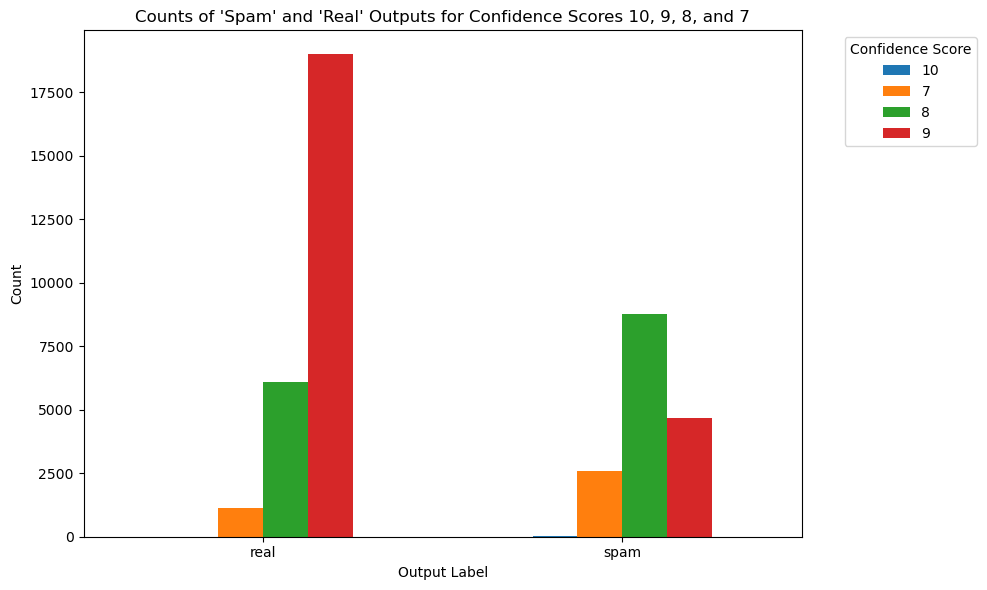

In [130]:
filtered_scores_all = df[df['OUTPUT'].isin(['spam', 'real']) & df['CONFIDENCE'].isin(['10', '9', '8', '7'])]
grouped_counts = filtered_scores_all.groupby(['OUTPUT', 'CONFIDENCE']).size().unstack(fill_value=0)

grouped_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Counts of 'Spam' and 'Real' Outputs for Confidence Scores 10, 9, 8, and 7")
plt.xlabel("Output Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Confidence Score", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


* We import `df_original`, which contains synthetic data for fake titles, segmented by their various categories defined in the `Subdirectorio` column. Next, we merge `df_original` with a DataFrame containing labels. To distinguish between fake titles from synthetic data and those derived from the most frequent title sample, we label the latter as `Real` in the `Subdirectorio` column. Thus, fake titles from synthetic data retain their category labels in `Subdirectorio`, whereas titles from the frequent sample are marked as `Real`.


In [153]:
df_original = pd.read_csv('data/merged_titles.csv', engine='python')


In [154]:
df_original.head()

,JOB_TITLE,Subdirectorio,embedding,Cluster
0,wxf bzr,Acronyms or Abbreviations That Are Unclear or ...,NaN,NaN
1,mkq szn,Acronyms or Abbreviations That Are Unclear or ...,NaN,NaN
2,vop rpfq,Acronyms or Abbreviations That Are Unclear or ...,NaN,NaN
3,ypl-3qf,Acronyms or Abbreviations That Are Unclear or ...,NaN,NaN
4,tspx vq,Acronyms or Abbreviations That Are Unclear or ...,NaN,NaN


In [155]:
df_original['Subdirectorio'].unique()

array(['Acronyms or Abbreviations That Are Unclear or Incomplete',
       'CompanyTitles',
       'Phrases or Words i Indicating Uncertainty or Lack of Information',
       'RandomFrases', 'jobfalses',
       'Fields of Study, Degrees, or Training Programs',
       'Job Advertisements or Descriptions', 'Real'], dtype=object)

In [156]:
df_original = df_original.dropna(subset=['JOB_TITLE'])

df_original = df_original.reset_index(drop=True)

In [20]:
duplicads_df = df[df.duplicated(subset='JOB_TITLE', keep=False)]
if not duplicads_df.empty:
    print(duplicads_df)
else:
    print("Not found anything.")

duplicateds = df_original[df_original.duplicated(subset='JOB_TITLE', keep=False)]
if not duplicateds.empty:
    print("Found:", len(duplicateds))
else:
    print("not duplicates in df_original in jobtitle.")


                 JOB_TITLE OUTPUT CONFIDENCE  \
817                    Sol   spam          8   
899                   Film   spam          7   
942                    Blå   spam          8   
947                 Vision   spam          8   
1500              ZłotyKąt   spam          7   
...                    ...    ...        ...   
40040                 雲の画家   spam          8   
41365  penulis cerita lucu   real          8   
41498  penulis cerita lucu   real          9   
42060  curador de cochilos   spam          8   
42064  curador de cochilos   spam          8   

                                                THINKING  
817    1. Understand the job title:\n- "Sol" is an ex...  
899    1. Understand what is the job title\n- The job...  
942    1. Understand what is the job title\n- "Blå" a...  
947    1. Understand what is the job title\n- "Vision...  
1500   1. Understand what is the job title\n- "ZłotyK...  
...                                                  ...  
40040  1. 

In [157]:
df = df.drop_duplicates(subset='JOB_TITLE', keep='first')

df_original = df_original.drop_duplicates(subset='JOB_TITLE', keep='first')


In [158]:
df_total_columns = pd.merge(df, df_original, on='JOB_TITLE', how='inner')

df_total_columns.head()


,JOB_TITLE,OUTPUT,CONFIDENCE,THINKING,Subdirectorio,embedding,Cluster
0,wxf bzr,spam,9,1. Understand what is the job title\n - The ...,Acronyms or Abbreviations That Are Unclear or ...,NaN,NaN
1,mkq szn,spam,9,1. Understand what is the job title\n- The job...,Acronyms or Abbreviations That Are Unclear or ...,NaN,NaN
2,vop rpfq,spam,9,"1. Understand the job title:\n - The input ""...",Acronyms or Abbreviations That Are Unclear or ...,NaN,NaN
3,ypl-3qf,spam,9,"1. Understand the job title:\n- The title ""ypl...",Acronyms or Abbreviations That Are Unclear or ...,NaN,NaN
4,tspx vq,spam,9,"1. Understand the job title:\n- ""tspx vq"" appe...",Acronyms or Abbreviations That Are Unclear or ...,NaN,NaN


In [159]:
df.shape

(42412, 4)

In [160]:
df_original.shape

(42425, 4)

In [161]:
df_total_columns.shape

(42412, 7)

In [162]:
df_total_columns.columns

Index(['JOB_TITLE', 'OUTPUT', 'CONFIDENCE', 'THINKING', 'Subdirectorio',
       'embedding', 'Cluster'],
      dtype='object')

In [163]:
df_total_columns['Subdirectorio'].unique()

array(['Acronyms or Abbreviations That Are Unclear or Incomplete',
       'CompanyTitles', 'jobfalses',
       'Fields of Study, Degrees, or Training Programs',
       'Job Advertisements or Descriptions', 'Real', 'RandomFrases',
       'Phrases or Words i Indicating Uncertainty or Lack of Information'],
      dtype=object)

## Data Filtering and Compliance Analysis

The code snippet executes several operations on the dataframe `df_total_columns`, focusing on the 'CONFIDENCE' column and compliance status derived from the 'OUTPUT' column. This analysis is part of the validation process for synthetic data of fake job titles.

### Key Operations:

1. **Display Unique Values**: The script prints the unique values in the 'CONFIDENCE' column to understand its data diversity.
   
2. **Data Cleaning**:
   - **Conversion to Numeric**: The 'CONFIDENCE' column is converted to numeric, with non-numeric values coerced into NaNs.
   - **Handling Missing Values**: Counts and prints the number of non-numeric values converted to NaNs.
   - **Row Filtering**: Removes rows with NaNs in the 'CONFIDENCE' column and further restricts data to values between 0 and 10.

3. **Compliance Status Assignment**:
   - **Filtering Rows**: Selects rows that do not belong to the 'Real' category in 'Subdirectorio'.
   - **Compliance Determination**: Applies a lambda function to determine compliance status based on the 'OUTPUT' column's value ('spam' indicates 'Compliant'; otherwise, 'Non-Compliant').

4. **Compliance Summary**:
   - **Counting Compliance**: Computes and visualizes the count of 'Compliant' vs 'Non-Compliant' statuses using a bar chart.
   - **Average Confidence by Compliance**: Calculates and visualizes the average 'CONFIDENCE' for each compliance status.

5. **Detailed Analysis**:
   - **Contingency Table**: Creates and visualizes a contingency table for 'CONFIDENCE' against compliance status, displaying the distribution across confidence levels.

### Visualizations:

- Two bar charts are generated to visually summarize the count and average confidence by compliance status.
- A bar chart for the contingency table highlights the distribution of confidence scores across compliance statuses.

### Context and Purpose:

The processed data will compare synthetic job titles' fake labels with their assigned confidence levels by the classifier, assessing the labels' accuracy. This analysis helps validate the classifier's efficacy before applying it to real job titles. Ultimately, the goal is to refine the synthetic dataset by keeping only those entries correctly labeled as 'fake,' reducing ambiguity in training the XGBoost model.


In [ ]:
!pip install pandas matplotlib seaborn


Unique values in 'CONFIDENCE':
['9' '8' '10' '7' '6'
 '8\n\nReasoning for confidence:\n- Very vague job description\n- Non-specific language\n- Implies attractive payment without clear job details\n- Sounds like a generic job advertisement\n- Uses broad, non-specific terminology\n- Lacks concrete job responsibilities'
 '5 (neutral, pending specific job title input)'
 '7 - Moderate confidence due to potential ambiguity of "bas" and need for more context'
 '1' '5'
 '6 - Moderate confidence. The title has some legitimate potential interpretations, but lacks complete clarity.'
 '9 - Both titles represent genuine professional roles with clear meaning and context'
 '9 (very high confidence)'
 '8 (High confidence in the evaluation methodology, but actual classification requires specific input)'
 '0 (No job title to evaluate)'
 '7\n\nReasoning for spam classification:\n- The title is very vague and non-specific\n- Sounds more like a description of a process than an actual job title\n- Lacks cl

/tmp/ipykernel_18642/842623211.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows['Compliance Status'] = filtered_rows['OUTPUT'].apply(lambda x: 'Compliant' if x.lower() == 'spam' else 'Non-Compliant')
/tmp/ipykernel_18642/842623211.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compliance_counts, x='Compliance Status', y='Count', palette=['green', 'red'])


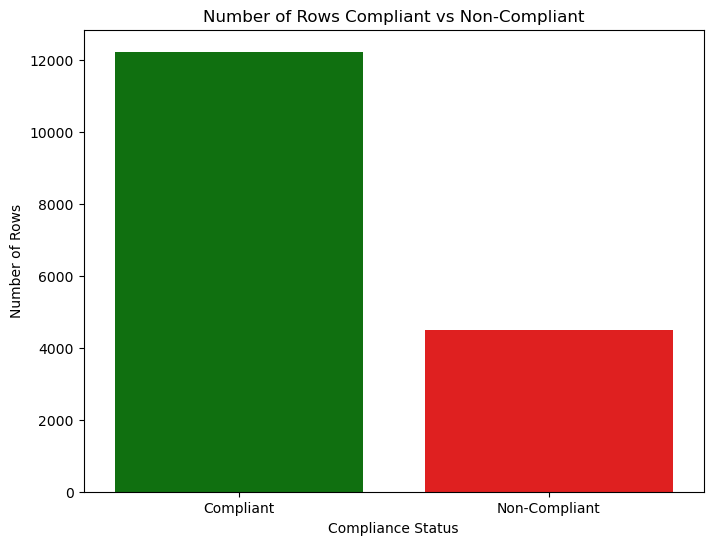

/tmp/ipykernel_18642/842623211.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_confidence, x='Compliance Status', y='CONFIDENCE', palette=['green', 'red'])


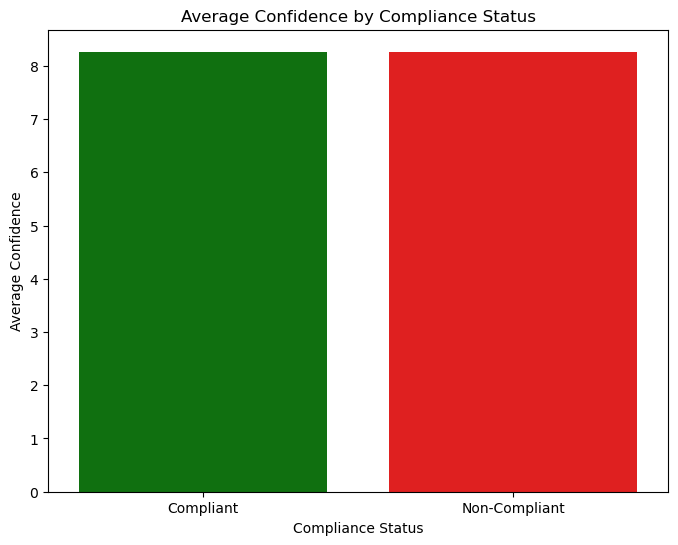

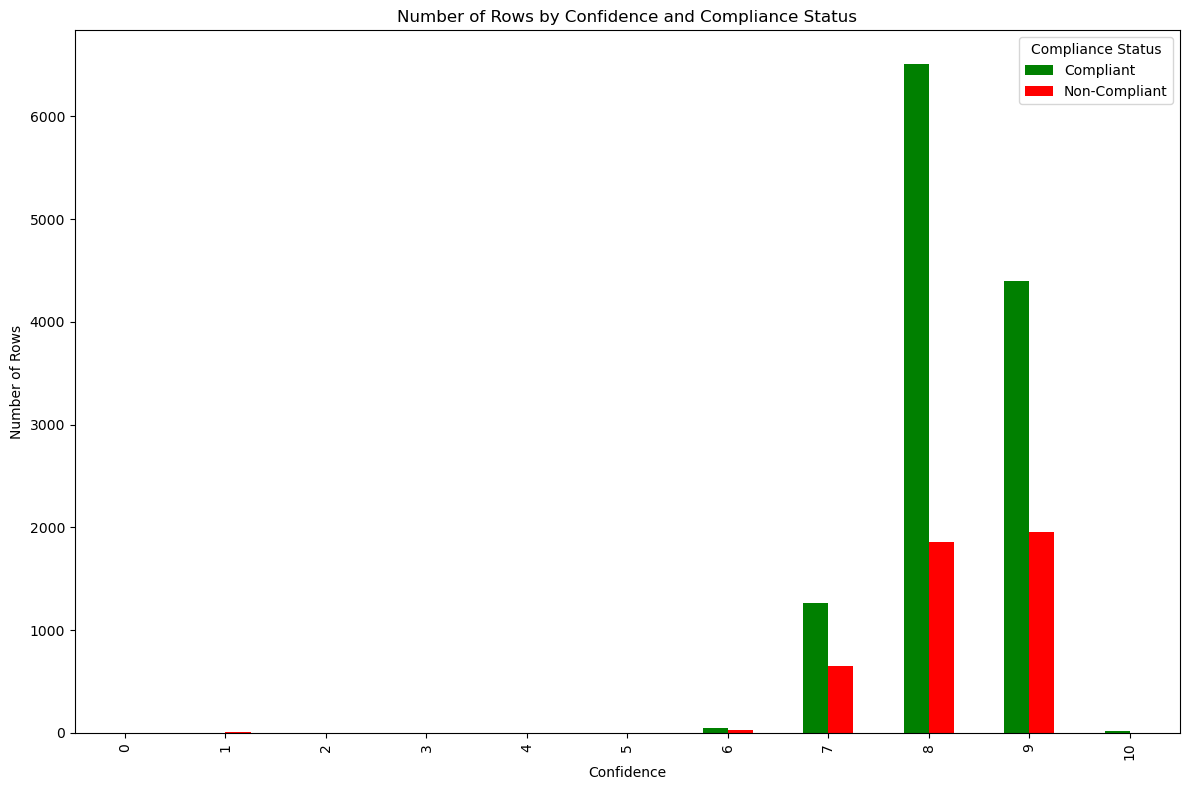

In [165]:

print("Unique values in 'CONFIDENCE':")
print(df_total_columns['CONFIDENCE'].unique())

df_total_columns['CONFIDENCE'] = pd.to_numeric(df_total_columns['CONFIDENCE'], errors='coerce')

num_missing = df_total_columns['CONFIDENCE'].isna().sum()
print(f"Number of non-numeric values in 'CONFIDENCE': {num_missing}")

df_total_columns = df_total_columns.dropna(subset=['CONFIDENCE'])

df_total_columns = df_total_columns[(df_total_columns['CONFIDENCE'] >= 0) & (df_total_columns['CONFIDENCE'] <= 10)]

filtered_rows = df_total_columns[~df_total_columns['Subdirectorio'].isin(['Real'])]

filtered_rows['Compliance Status'] = filtered_rows['OUTPUT'].apply(lambda x: 'Compliant' if x.lower() == 'spam' else 'Non-Compliant')

compliance_counts = filtered_rows['Compliance Status'].value_counts().reset_index()
compliance_counts.columns = ['Compliance Status', 'Count']

if 'Compliant' not in compliance_counts['Compliance Status'].values:
    compliance_counts = compliance_counts.append({'Compliance Status': 'Compliant', 'Count': 0}, ignore_index=True)
if 'Non-Compliant' not in compliance_counts['Compliance Status'].values:
    compliance_counts = compliance_counts.append({'Compliance Status': 'Non-Compliant', 'Count': 0}, ignore_index=True)

compliance_counts = compliance_counts.set_index('Compliance Status').loc[['Compliant', 'Non-Compliant']].reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=compliance_counts, x='Compliance Status', y='Count', palette=['green', 'red'])
plt.title("Number of Rows Compliant vs Non-Compliant")
plt.ylabel("Number of Rows")
plt.xlabel("Compliance Status")
plt.show()

average_confidence = filtered_rows.groupby('Compliance Status')['CONFIDENCE'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=average_confidence, x='Compliance Status', y='CONFIDENCE', palette=['green', 'red'])
plt.title("Average Confidence by Compliance Status")
plt.ylabel("Average Confidence")
plt.xlabel("Compliance Status")
plt.show()

contingency_table = pd.crosstab(filtered_rows['CONFIDENCE'], filtered_rows['Compliance Status'])
contingency_table = contingency_table.reindex(range(0, 11), fill_value=0)

contingency_table.plot(kind='bar', figsize=(12,8), color=['green', 'red'])
plt.title("Number of Rows by Confidence and Compliance Status")
plt.xlabel("Confidence")
plt.ylabel("Number of Rows")
plt.legend(title='Compliance Status')
plt.tight_layout()
plt.show()




* Fortunately, the labeler is very consistent with the received data*. However, next, we will visualize the categories where there may have been more errors.

* Note: The labeling consistency indicates reliable data handling and preprocessing, but an analysis of error-prone categories will help further refine the system.


In [166]:
df_spam = df_total_columns[df_total_columns['OUTPUT'] == 'spam']

spam_counts = df_spam['Subdirectorio'].value_counts().reset_index()
spam_counts.columns = ['Subdirectorio', 'Spam_Quantity']

spam_counts.head()


,Subdirectorio,Spam_Quantity
0,Real,3869
1,RandomFrases,3330
2,jobfalses,2310
3,CompanyTitles,2303
4,Job Advertisements or Descriptions,2234


In [167]:
total_counts = df_total_columns['Subdirectorio'].value_counts().reset_index()
total_counts.columns = ['Subdirectorio', 'Total']

spam_por_subdir = pd.merge(spam_counts, total_counts, on='Subdirectorio')

spam_por_subdir['Spam_Ratio'] = spam_por_subdir['Spam_Quantity'] / spam_por_subdir['Total']


In [168]:
spam_por_subdir.head()

,Subdirectorio,Spam_Quantity,Total,Spam_Ratio
0,Real,3869,25643,0.150879
1,RandomFrases,3330,3359,0.991366
2,jobfalses,2310,3011,0.767187
3,CompanyTitles,2303,2987,0.771008
4,Job Advertisements or Descriptions,2234,3121,0.715796


## Analysis of Titles Labeled as 'Spam'

The data analysis reveals insights about the titles categorized as 'spam'. While a modest number of these are from the 'Real' category—potentially correctly labeled since this category comprises the most frequent job titles—there is also a likelihood of mislabeled titles given their proportion.

### Noteworthy Observations:

- **Mislabeling in Specific Categories**: Higher error rates are observed in categories such as 'Fields of Study', 'Degrees', or 'Training Programs', where the labeling model appears less accurate.

*Note: Among the titles labeled as spam, we observe a modest sum labeled as 'Real', which might be correctly labeled as this subdirectory defines those extracted from the most frequent job titles dataset. However, the proportion suggests there might also be mislabeled titles.*


/tmp/ipykernel_18642/3432877308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spam_por_subdir, x='Spam_Ratio', y='Subdirectorio', palette='magma')


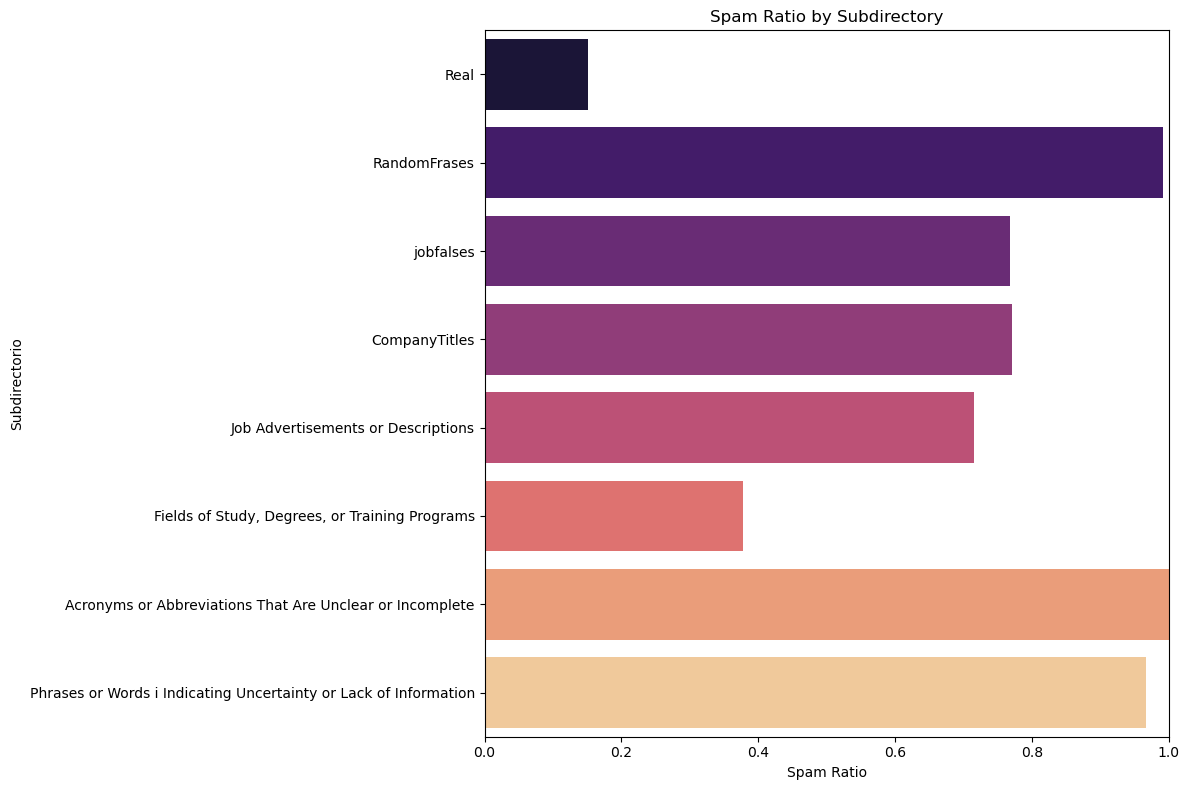

In [169]:
plt.figure(figsize=(12, 8))
sns.barplot(data=spam_por_subdir, x='Spam_Ratio', y='Subdirectorio', palette='magma')
plt.title('Spam Ratio by Subdirectory')
plt.xlabel('Spam Ratio')
plt.ylabel('Subdirectorio')
plt.xlim(0, 1)  # Ya que es una proporción
plt.tight_layout()
plt.show()


In [171]:
titles_falses = df_total_columns[
    (df_total_columns['Subdirectorio'] != 'Real') &
    (df_total_columns['OUTPUT'].str.lower() == 'spam') &
    (df_total_columns['CONFIDENCE'].isin([8, 9]))
][['JOB_TITLE']]

titles_falses.to_csv('titles_falses_final.csv', index=False)


In [172]:
titles_falses.shape

(10904, 1)

In [173]:
df_total_columns[df_total_columns['JOB_TITLE'] == 'rn er i'] #checking why that's 'real'

,JOB_TITLE,OUTPUT,CONFIDENCE,THINKING,Subdirectorio,embedding,Cluster
9045,rn er i,spam,9.0,"1. Understand the job title:\n- Input is ""rn e...",Real,"[-0.002476431429386139, -0.011528815142810345,...",0.0


## Strategy for Filtering Real and Fake Job Titles

The process outlined involves selective filtering of both real and fake job titles based on specific criteria, ensuring the final dataset is balanced and unbiased, particularly in terms of language distribution.

### Selection Criteria:

1. **Fake Titles**:
   - **Label Consistency**: Only include fake titles that were consistently labeled as such by the classifier and match the synthetic data.
   
2. **Real Titles**:
   - **High Confidence Real Labels**: Select only those titles labeled as real with a high confidence level (threshold of 9).
   - **Subdirectory Exclusion**: Exclude any titles that have a 'Real' label in the 'Subdirectorio' column, indicating that they might not actually be authentic real job titles.

### Language Distribution Analysis:

- **Minority Dataset (Fake Titles)**: Analyze the language distribution within the fake titles to understand the minority group's linguistic diversity.
- **Adjusting the Real Titles**: Reduce the dataset of real titles by matching the language distribution found in the fake titles. This step is crucial to prevent language bias, as language embeddings can significantly influence model behavior and performance by capturing language-specific features.

### Objective:

The objective of this strategy is to refine the datasets for a machine learning model training process, particularly for an XGBoost model. By aligning the language distributions and ensuring label accuracy, the model is less likely to develop a bias toward certain languages, thus improving its generalizability and effectiveness across diverse linguistic contexts.


In [174]:
titles_real = df_total_columns[
    (df_total_columns['Subdirectorio'] == 'Real') &
    (df_total_columns['OUTPUT'].str.lower() == 'real') &
    (df_total_columns['CONFIDENCE'].isin([9]))
]



In [175]:
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', True) 

In [176]:
titles_real.head()

,JOB_TITLE,OUTPUT,CONFIDENCE,THINKING,Subdirectorio,embedding,Cluster
8791,mekaniker lærling,real,9.0,"1. Understand the job title:\n- ""mekaniker lær...",Real,"[-0.015464311465620995, -0.012787009589374065,...",0.0
8792,pakkerioperatør,real,9.0,"1. Understand the job title:\n- ""pakkerioperat...",Real,"[-0.0037420056760311127, -0.025967968627810478...",0.0
8794,programudvikler,real,9.0,"1. Understand what is the job title\n- ""progra...",Real,"[0.0011849647853523493, -0.021040838211774826,...",0.0
8796,datafagtekniker lærling,real,9.0,"1. Understand the job title:\n - ""datafagtek...",Real,"[-0.019192222505807877, -0.007996759377419949,...",0.0
8798,frisør,real,9.0,"1. Understand what is the job title\n- ""frisør...",Real,"[-0.009900701232254505, -0.034403253346681595,...",0.0


In [177]:
df_real_titles_with_lang = pd.read_csv('data/df_total_with_languages.csv')

In [178]:
df_real_titles_with_lang.head()

,JOB_TITLE,FREQ,language
0,project manager,7962088,en
1,manager,7853881,en
2,owner,6736033,en
3,intern,6670574,en
4,software engineer,6491523,en


In [179]:
df_merged_real_titles_with_lang = pd.merge(df_real_titles_with_lang, titles_real, on = 'JOB_TITLE', how='inner')

In [180]:
df_merged_real_titles_with_lang.shape

(17021, 9)

In [181]:
df_merged_real_titles_with_lang.head()

,JOB_TITLE,FREQ,language,OUTPUT,CONFIDENCE,THINKING,Subdirectorio,embedding,Cluster
0,praktikant,273458,tr,real,9.0,"1. Understand the job title:\n- ""Praktikant"" a...",Real,"[-0.011051123030483723, -0.035384975373744965,...",31.0
1,claims adjuster,135721,da,real,9.0,"1. Understand the job title:\n- ""Claims Adjust...",Real,"[-0.01558340061455965, -0.0033911450300365686,...",18.0
2,industriemechaniker,127776,sv,real,9.0,"1. Understand the job title\n- ""Industriemecha...",Real,"[-0.004307588096708059, -0.01633126102387905, ...",41.0
3,tour guide,113307,ru,real,9.0,"1. Understand what is the job title\n- ""tour g...",Real,"[-0.010901406407356262, -0.02037557028234005, ...",48.0
4,chargée de clientèle,54941,fr,real,9.0,"1. Understand the job title:\n- ""Chargée de cl...",Real,"[-0.005256235133856535, -0.005889357533305883,...",49.0


In [182]:
df_merged_real_titles_with_lang.columns

Index(['JOB_TITLE', 'FREQ', 'language', 'OUTPUT', 'CONFIDENCE', 'THINKING',
       'Subdirectorio', 'embedding', 'Cluster'],
      dtype='object')

In [183]:
df_merged_real_titles_with_lang.to_csv('df_merged_real_titles_with_lang.csv', index=False)


In [184]:
language_counts_real = df_merged_real_titles_with_lang['language'].value_counts()

cluster_counts = df_merged_real_titles_with_lang['Cluster'].value_counts()

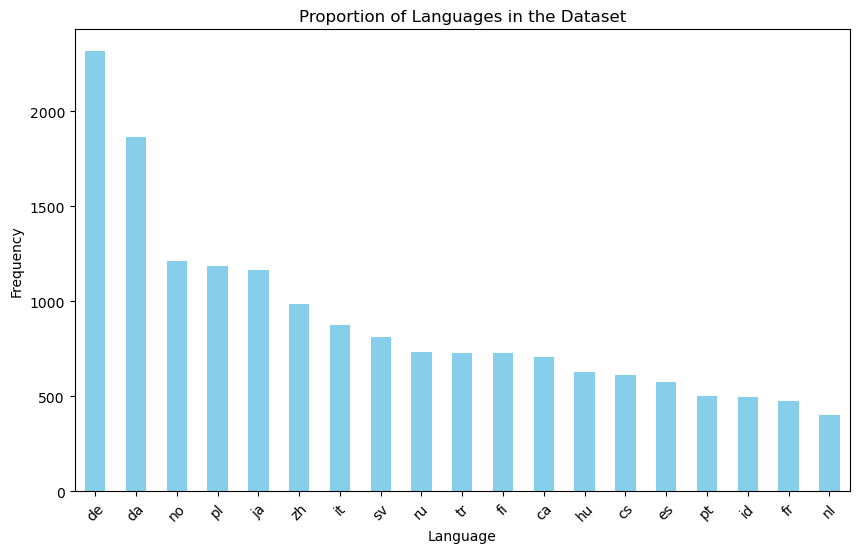

In [185]:
plt.figure(figsize=(10, 6))  
language_counts_real.plot(kind='bar', color='skyblue')  
plt.title('Proportion of Languages in the Dataset')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.show()


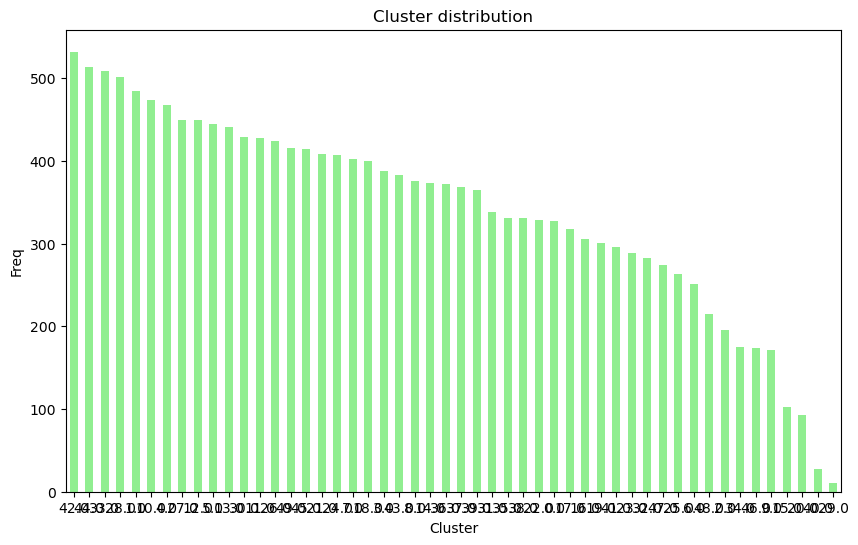

In [186]:
plt.figure(figsize=(10, 6)) 
cluster_counts.plot(kind='bar', color='lightgreen')  
plt.title('Cluster distribution')
plt.xlabel('Cluster')
plt.ylabel('Freq')
plt.xticks(rotation=0)  
plt.show()


In [ ]:
!pip install fasttext

import fasttext

!wget -q -O lid.176.ftz https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.ftz

model_fasttext = fasttext.load_model('lid.176.ftz')

def detect_language_fasttext(text):
    prediction = model_fasttext.predict(text.replace('\n', ' '), k=1)
    lang = prediction[0][0].replace('__label__', '')
    return lang

In [188]:
import time
start_time = time.time()
titles_falses['language'] = titles_falses['JOB_TITLE'].apply(detect_language_fasttext)
time_fasttext = time.time() - start_time
print(f"FastText - Time taken: {time_fasttext:.2f} seconds")

FastText - Time taken: 0.15 seconds


In [189]:
language_counts_falses = titles_falses['language'].value_counts().nlargest(19)

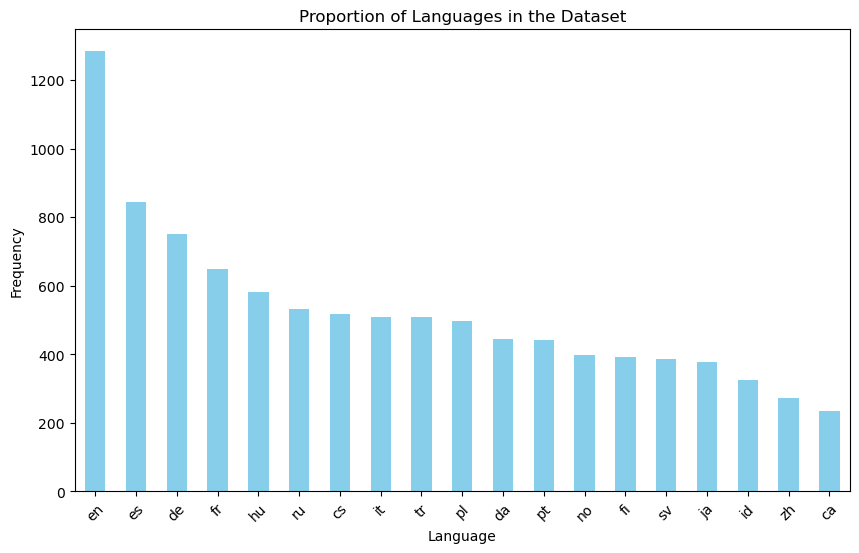

In [190]:
plt.figure(figsize=(10, 6))  
language_counts_falses.plot(kind='bar', color='skyblue')  
plt.title('Proportion of Languages in the Dataset')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.show()


In [191]:
titles_falses['language']

0        en
1        hu
2        en
3        en
4        ar
         ..
42407    pl
42408    pl
42409    pl
42410    pl
42411    pl
Name: language, Length: 10904, dtype: object

In [192]:
titles_falses[titles_falses['language'] == 'en'] 

,JOB_TITLE,language
0,wxf bzr,en
2,vop rpfq,en
3,ypl-3qf,en
5,stb 4n,en
6,lzp mpfn,en
...,...,...
42312,luftballongsspanare,en
42316,dynamitpuffprototypare,en
42337,vågskvalpsexpert,en
42365,glasspinnsdesignspecialist,en


In [193]:
subset_real_titles_final = df_merged_real_titles_with_lang.groupby('language').apply(
    lambda x: x.sample(min(len(x), 600), replace=False)).reset_index(drop=True)

In [194]:
subset_real_titles_final.head()

,JOB_TITLE,FREQ,language,OUTPUT,CONFIDENCE,THINKING,Subdirectorio,embedding,Cluster
0,auxiliar egresos,22,ca,real,9.0,"1. Understand the job title:\n- ""auxiliar egre...",Real,"[-0.010989726521074772, -0.007104469928890467,...",45.0
1,operadora de teleprocessamento,17,ca,real,9.0,"1. Understand the job title:\n- ""Operadora de ...",Real,"[-0.04118714854121208, -0.00814212765544653, 0...",39.0
2,educatore nido d'infanzia,38,ca,real,9.0,"1. Understand the job title:\n - ""Educatore ...",Real,"[-0.01267112698405981, -0.003064248710870743, ...",23.0
3,auxiliar de cocina parrilla,33,ca,real,9.0,"1. Understand the job title:\n- ""auxiliar de c...",Real,"[-0.005690705496817827, 0.0003567288804333657,...",45.0
4,administratiu va de magatzem,22,ca,real,9.0,1. Understand the job title:\n- Language appea...,Real,"[-0.00490789907053113, -0.009461721405386925, ...",6.0


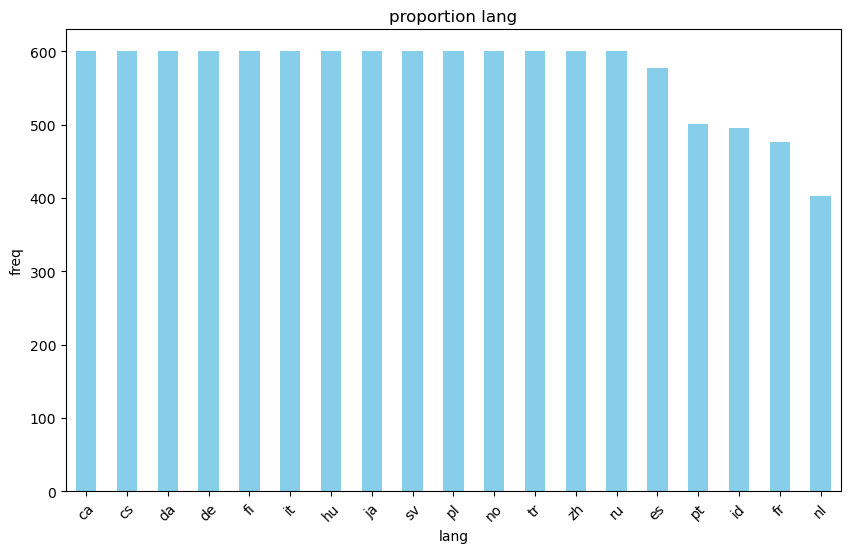

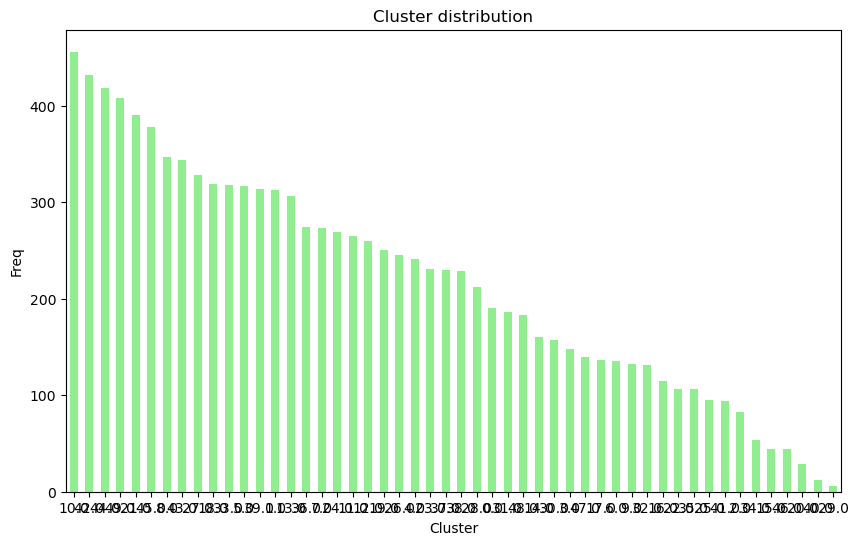

In [195]:
language_counts_real_subset = subset_real_titles_final['language'].value_counts()

cluster_counts = subset_real_titles_final['Cluster'].value_counts()

plt.figure(figsize=(10, 6))  
language_counts_real_subset.plot(kind='bar', color='skyblue')  
plt.title('proportion lang')
plt.xlabel('lang')
plt.ylabel('freq')
plt.xticks(rotation=45) 
plt.show()

plt.figure(figsize=(10, 6)) 
cluster_counts.plot(kind='bar', color='lightgreen')  
plt.title('Cluster distribution')
plt.xlabel('Cluster')
plt.ylabel('Freq')
plt.xticks(rotation=0)  
plt.show()


In [196]:
subset_real_titles_final.shape

(10853, 9)

In [111]:
subset_real_titles_final.to_csv('titles_real_final.csv')

## Conclusion: Final Selection of Real and Fake Job Titles

The selection process for determining which job titles to retain for the dataset involved careful consideration of both synthetic and real categories, ensuring balance and representativeness across linguistic features.

### Selection Process for Fake Titles:

- **Criteria**: Titles are considered fake if they are:
  - Located in categories specifically defined for synthetic data.
  - Labeled as 'false' by the classifier (haiku).

### Selection Process for Real Titles:

- **Criteria**: Titles are selected as real if they are:
  - Labeled as 'real' with a high confidence level of 9.
  - Not located in a category associated with synthetic data.

### Balancing the Datasets:

- **Equal Class Sizes**: Both classes (real and fake) are adjusted to have approximately 10,800 titles each.
- **Language Distribution**: Reduction in the number of real titles was conducted to achieve a balanced language distribution between the two classes.

### Objective and Importance:

This careful selection and balancing approach ensures that neither class has a predominant language that could introduce bias into the machine learning model. This methodology is crucial for developing a robust model that performs consistently and fairly across different linguistic contexts, thereby enhancing the overall accuracy and reliability of the model's predictions.
